In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import time

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import sklearn as sk
from sklearn import cluster
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn

In [3]:
def removeNaN(boolean):
    if boolean:
        return 1
    return 0

data['Cancelled'] = data['Cancelled'].apply(convertCancelled)
data

NameError: name 'convertCancelled' is not defined

In [2]:
data = pd.read_csv('shuffled_data2.csv')
data.drop(columns = data.columns[0], inplace=True)
print("len before dropna")
print(len(data))
data.dropna(inplace=True)
print('len after dropna')
print(len(data))
data.reset_index(inplace = True)
data.drop(columns=['index'], inplace=True)
data

len before dropna
60000
len after dropna
58285


,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestCityName,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup
0,2018-01-04,Delta Air Lines Inc.,ATL,BWI,False,1100,1100.0,0.0,1244.0,0.0,...,"Baltimore, MD",Maryland,0.0,0.0,1100-1159,1248,0.0,-1.0,1200-1259,3
1,2018-01-04,Delta Air Lines Inc.,PBI,ATL,False,658,712.0,14.0,921.0,32.0,...,"Atlanta, GA",Georgia,0.0,0.0,0600-0659,849,1.0,2.0,0800-0859,3
2,2018-01-04,Delta Air Lines Inc.,CVG,LAX,False,855,855.0,0.0,1049.0,0.0,...,"Los Angeles, CA",California,0.0,0.0,0800-0859,1050,0.0,-1.0,1000-1059,8
3,2018-01-04,Delta Air Lines Inc.,DTW,BUF,False,2216,2209.0,0.0,2333.0,4.0,...,"Buffalo, NY",New York,0.0,-1.0,2200-2259,2329,0.0,0.0,2300-2359,1
4,2018-01-04,Delta Air Lines Inc.,SLC,MSP,False,2023,2333.0,190.0,256.0,166.0,...,"Minneapolis, MN",Minnesota,1.0,12.0,2000-2059,10,1.0,11.0,0001-0559,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58280,2022-03-31,Alaska Airlines Inc.,SEA,DTW,False,1020,1016.0,0.0,1727.0,0.0,...,"Detroit, MI",Michigan,0.0,-1.0,1000-1059,1735,0.0,-1.0,1700-1759,8
58281,2022-03-31,Alaska Airlines Inc.,SEA,LAX,False,1805,1800.0,0.0,2024.0,0.0,...,"Los Angeles, CA",California,0.0,-1.0,1800-1859,2045,0.0,-2.0,2000-2059,4
58282,2022-03-31,Alaska Airlines Inc.,SEA,LAS,False,810,822.0,12.0,1046.0,6.0,...,"Las Vegas, NV",Nevada,0.0,0.0,0800-0859,1040,0.0,0.0,1000-1059,4
58283,2022-03-31,Alaska Airlines Inc.,SFO,SEA,False,1200,1154.0,0.0,1414.0,4.0,...,"Seattle, WA",Washington,0.0,-1.0,1200-1259,1410,0.0,0.0,1400-1459,3


In [4]:
data.describe()

,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,DayOfWeek,FlightNumber,DestAirportID,DepDel15,DepartureDelayGroups,CRSArrTime,ArrDel15,ArrivalDelayGroups,DistanceGroup
count,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000,58285.000000
mean,1330.913631,1336.155855,11.836527,1472.325504,11.541820,103.360470,132.638981,126.346195,735.917217,3.981179,2784.013777,12659.344891,0.168929,-0.043133,1489.965926,0.164502,-0.352218,3.424071
std,483.607399,495.339987,42.584416,525.713888,42.273997,66.334208,68.145998,68.062905,556.220089,1.983765,1859.748686,1586.719113,0.374692,2.050540,510.484735,0.370734,2.182263,2.198114
min,5.000000,1.000000,0.000000,1.000000,0.000000,4.000000,20.000000,16.000000,31.000000,1.000000,1.000000,10135.000000,0.000000,-2.000000,1.000000,0.000000,-2.000000,1.000000
25%,920.000000,923.000000,0.000000,1054.000000,0.000000,57.000000,85.000000,79.000000,342.000000,2.000000,1142.000000,11259.000000,0.000000,-1.000000,1105.000000,0.000000,-1.000000,2.000000
50%,1323.000000,1328.000000,0.000000,1506.000000,0.000000,85.000000,115.000000,108.000000,584.000000,4.000000,2451.000000,12889.000000,0.000000,-1.000000,1514.000000,0.000000,-1.000000,3.000000
75%,1735.000000,1742.000000,5.000000,1914.000000,5.000000,130.000000,160.000000,154.000000,954.000000,6.000000,4654.000000,14100.000000,0.000000,0.000000,1918.000000,0.000000,0.000000,4.000000
max,2359.000000,2400.000000,1524.000000,2400.000000,1534.000000,687.000000,700.000000,720.000000,5095.000000,7.000000,9381.000000,16869.000000,1.000000,12.000000,2359.000000,1.000000,12.000000,11.000000


We can check that if Departure Time and Departure delay are correlated, this is not supposed to be the case, but actually, the later the time of departure it is, the more probable the plane will be delayed, supposing that we have the same frequency of flights at any time of the day.

In [4]:
cancel = data[data['Cancelled'] == True]
cancel

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestCityName,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup


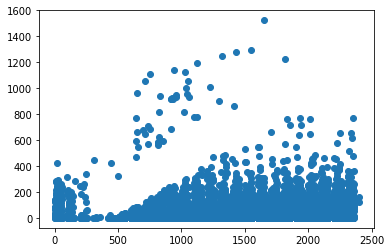

In [5]:
plt.plot(data["DepTime"], data["DepDelay"], 'o')

<AxesSubplot:>

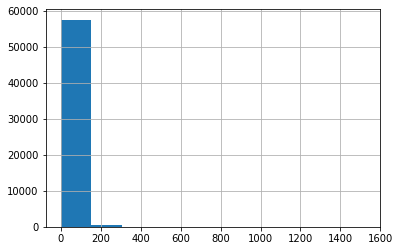

In [6]:
data['DepDelay'].hist()

However it seems obvious that distance and time spent flying are correlated, we can deduce the average speed of planes by getting the derivative of the graph AirTime = f(Distance)


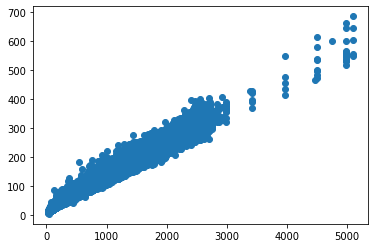

In [7]:
plt.plot(data["Distance"], data["AirTime"], 'o')

In [8]:
def convertTime(str_time):
    timestamp = datetime.datetime.strptime(str_time,"%Y-%m-%d")
    tuple = timestamp.timetuple()
    timestamp = time.mktime(tuple)

    return(timestamp)

In [9]:
data['Date'] = data['Date'].apply(convertTime)
data

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestCityName,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup
0,1.515020e+09,Delta Air Lines Inc.,ATL,BWI,False,1100,1100.0,0.0,1244.0,0.0,...,"Baltimore, MD",Maryland,0.0,0.0,1100-1159,1248,0.0,-1.0,1200-1259,3
1,1.515020e+09,Delta Air Lines Inc.,PBI,ATL,False,658,712.0,14.0,921.0,32.0,...,"Atlanta, GA",Georgia,0.0,0.0,0600-0659,849,1.0,2.0,0800-0859,3
2,1.515020e+09,Delta Air Lines Inc.,CVG,LAX,False,855,855.0,0.0,1049.0,0.0,...,"Los Angeles, CA",California,0.0,0.0,0800-0859,1050,0.0,-1.0,1000-1059,8
3,1.515020e+09,Delta Air Lines Inc.,DTW,BUF,False,2216,2209.0,0.0,2333.0,4.0,...,"Buffalo, NY",New York,0.0,-1.0,2200-2259,2329,0.0,0.0,2300-2359,1
4,1.515020e+09,Delta Air Lines Inc.,SLC,MSP,False,2023,2333.0,190.0,256.0,166.0,...,"Minneapolis, MN",Minnesota,1.0,12.0,2000-2059,10,1.0,11.0,0001-0559,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58280,1.648678e+09,Alaska Airlines Inc.,SEA,DTW,False,1020,1016.0,0.0,1727.0,0.0,...,"Detroit, MI",Michigan,0.0,-1.0,1000-1059,1735,0.0,-1.0,1700-1759,8
58281,1.648678e+09,Alaska Airlines Inc.,SEA,LAX,False,1805,1800.0,0.0,2024.0,0.0,...,"Los Angeles, CA",California,0.0,-1.0,1800-1859,2045,0.0,-2.0,2000-2059,4
58282,1.648678e+09,Alaska Airlines Inc.,SEA,LAS,False,810,822.0,12.0,1046.0,6.0,...,"Las Vegas, NV",Nevada,0.0,0.0,0800-0859,1040,0.0,0.0,1000-1059,4
58283,1.648678e+09,Alaska Airlines Inc.,SFO,SEA,False,1200,1154.0,0.0,1414.0,4.0,...,"Seattle, WA",Washington,0.0,-1.0,1200-1259,1410,0.0,0.0,1400-1459,3


In [10]:
airlines = data['Airline'].unique()
print(airlines)

origins = data['Origin'].unique()
destinations = data['Destination'].unique()
airports = np.unique(np.concatenate([origins, destinations]))
print(airports)

['Delta Air Lines Inc.' 'Southwest Airlines Co.' 'Spirit Air Lines'
 'SkyWest Airlines Inc.' 'Alaska Airlines Inc.' 'Comair Inc.'
 'Endeavor Air Inc.' 'Hawaiian Airlines Inc.']
['ABE' 'ABI' 'ABQ' 'ABR' 'ABY' 'ACK' 'ACT' 'ACV' 'ACY' 'ADK' 'ADQ' 'AEX'
 'AGS' 'AKN' 'ALB' 'ALS' 'AMA' 'ANC' 'APN' 'ART' 'ASE' 'ATL' 'ATW' 'ATY'
 'AUS' 'AVL' 'AVP' 'AZO' 'BDL' 'BET' 'BFF' 'BFL' 'BGM' 'BGR' 'BHM' 'BIH'
 'BIL' 'BIS' 'BJI' 'BLI' 'BMI' 'BNA' 'BOI' 'BOS' 'BQK' 'BQN' 'BRD' 'BRO'
 'BRW' 'BTM' 'BTR' 'BTV' 'BUF' 'BUR' 'BWI' 'BZN' 'CAE' 'CAK' 'CDC' 'CDV'
 'CGI' 'CHA' 'CHO' 'CHS' 'CID' 'CIU' 'CKB' 'CLE' 'CLL' 'CLT' 'CMH' 'CMX'
 'CNY' 'COD' 'COS' 'COU' 'CPR' 'CRP' 'CRW' 'CSG' 'CVG' 'CWA' 'CYS' 'DAB'
 'DAL' 'DAY' 'DCA' 'DDC' 'DEC' 'DEN' 'DFW' 'DHN' 'DIK' 'DLG' 'DLH' 'DRO'
 'DSM' 'DTW' 'DVL' 'EAR' 'EAU' 'ECP' 'EGE' 'EKO' 'ELM' 'ELP' 'ERI' 'ESC'
 'EUG' 'EVV' 'EWN' 'EWR' 'EYW' 'FAI' 'FAR' 'FAT' 'FAY' 'FCA' 'FLG' 'FLL'
 'FNT' 'FOD' 'FSD' 'FSM' 'FWA' 'GCC' 'GEG' 'GFK' 'GJT' 'GNV' 'GPT' 'GRB'
 'GRI' 'GRK' 'GRR' '

In [11]:
print(data.columns)

Index(['Date', 'Airline', 'Origin', 'Destination', 'Cancelled', 'CRSDepTime',
       'DepTime', 'DepDelay', 'ArrTime', 'ArrDelay', 'AirTime',
       'CRSElapsedTime', 'ActualElapsedTime', 'Distance', 'DayOfWeek',
       'Operating_Airline', 'Tail_Number', 'FlightNumber', 'OriginAirportID',
       'OriginCityName', 'OriginStateName', 'DestAirportID', 'DestCityName',
       'DestStateName', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk',
       'CRSArrTime', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'DistanceGroup'],
      dtype='object')


On transforme les catégories de data en entier pour la manipulation de classe

In [12]:
data_original = data.copy()

data["Airline"] = LabelEncoder().fit_transform(data["Airline"])
data["Origin"] = LabelEncoder().fit_transform(data["Origin"])
data["Destination"] = LabelEncoder().fit_transform(data["Destination"])
data["Operating_Airline"] = LabelEncoder().fit_transform(data["Operating_Airline"])
data["Tail_Number"] = LabelEncoder().fit_transform(data["Tail_Number"])
data["OriginAirportID"] = LabelEncoder().fit_transform(data["OriginAirportID"])
data["OriginCityName"] = LabelEncoder().fit_transform(data["OriginCityName"])
data["OriginStateName"] = LabelEncoder().fit_transform(data["OriginStateName"])
data["DestCityName"] = LabelEncoder().fit_transform(data["DestCityName"])
data["DestStateName"] = LabelEncoder().fit_transform(data["DestStateName"])
data["DepTimeBlk"] = LabelEncoder().fit_transform(data["DepTimeBlk"])
data["ArrTimeBlk"] = LabelEncoder().fit_transform(data["ArrTimeBlk"])

In [13]:
def convertCancelled(boolean):
    if boolean:
        return 1
    return 0

data['Cancelled'] = data['Cancelled'].apply(convertCancelled)
data

,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,DepDelay,ArrTime,ArrDelay,...,DestCityName,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup
0,1.515020e+09,2,20,51,0,1100,1100.0,0.0,1244.0,0.0,...,22,18,0.0,0.0,6,1248,0.0,-1.0,7,3
1,1.515020e+09,2,240,19,0,658,712.0,14.0,921.0,32.0,...,17,8,0.0,0.0,1,849,1.0,2.0,3,3
2,1.515020e+09,2,79,176,0,855,855.0,0.0,1049.0,0.0,...,181,4,0.0,0.0,3,1050,0.0,-1.0,5,8
3,1.515020e+09,2,95,49,0,2216,2209.0,0.0,2333.0,4.0,...,42,30,0.0,-1.0,17,2329,0.0,0.0,18,1
4,1.515020e+09,2,295,220,0,2023,2333.0,190.0,256.0,166.0,...,198,21,1.0,12.0,15,10,1.0,11.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58280,1.648678e+09,0,284,93,0,1020,1016.0,0.0,1727.0,0.0,...,80,20,0.0,-1.0,5,1735,0.0,-1.0,12,8
58281,1.648678e+09,0,284,176,0,1805,1800.0,0.0,2024.0,0.0,...,181,4,0.0,-1.0,13,2045,0.0,-2.0,15,4
58282,1.648678e+09,0,284,174,0,810,822.0,12.0,1046.0,6.0,...,170,26,0.0,0.0,3,1040,0.0,0.0,5,4
58283,1.648678e+09,0,285,283,0,1200,1154.0,0.0,1414.0,4.0,...,283,47,0.0,-1.0,7,1410,0.0,0.0,9,3


Désormais (hormis normalisation), toutes les données peuvent être fournies à des algorithmes de classification, on se propose de séparer le dataset un set de validation, un de training et un de test.

In [14]:
def train_test_split(data: pd.DataFrame, target_key:str, percent_test: int =15, percent_validation: int=5):
    # Write code here 
    data = data.sample(frac=1)
    print(len(data))
    first_separator = len(data) - int(len(data) / 100 * (percent_test+percent_validation))
    print(first_separator)
    second_separator = len(data) - int(len(data) / 100 * percent_validation)
    print(second_separator)
    
    X_train = data.iloc[:first_separator]
    y_train = X_train[target_key]
    
    X_test = data.iloc[first_separator:second_separator]
    y_test = X_test[target_key]
    #third_separator = int(len(data) / 100 * percent_test)
    #X_test = X_test.loc[:third_separator, :]
    #y_test = y_test.loc[:third_separator, target_key]
    
    X_validation = data.iloc[second_separator:]
    y_validation = X_validation[target_key]
    
    X_test.drop(target_key, inplace=True, axis=1)
    X_train.drop(target_key, inplace=True, axis=1)
    X_validation.drop(target_key, inplace=True, axis=1)
    
    return X_train, y_train, X_test, y_test, X_validation, y_validation

In [17]:
X_train, y_train, X_test, y_test, X_validation, y_validation = train_test_split(data, target_key="DepDelay")
X_train

58285
46628
55371


/tmp/ipykernel_19188/4112190476.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.drop(target_key, inplace=True, axis=1)
/tmp/ipykernel_19188/4112190476.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.drop(target_key, inplace=True, axis=1)
/tmp/ipykernel_19188/4112190476.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_validation.drop(target_key, inplace=True, axis=1)


,Date,Airline,Origin,Destination,Cancelled,CRSDepTime,DepTime,ArrTime,ArrDelay,AirTime,...,DestCityName,DestStateName,DepDel15,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup
21516,1.552604e+09,3,66,40,0,1157,1150.0,1325.0,0.0,75.0,...,36,19,0.0,-1.0,6,1358,0.0,-2.0,8,3
24562,1.572649e+09,6,292,185,0,1450,1446.0,1555.0,0.0,57.0,...,180,4,0.0,-1.0,9,1605,0.0,-1.0,11,2
54092,1.643756e+09,1,283,83,0,1957,1944.0,2107.0,0.0,64.0,...,312,46,0.0,-1.0,14,2133,0.0,-2.0,16,2
34960,1.548803e+09,2,220,176,0,650,858.0,1051.0,101.0,195.0,...,181,4,1.0,8.0,1,910,1.0,6.0,4,7
17952,1.558649e+09,2,79,271,0,1000,1009.0,1214.0,0.0,111.0,...,106,7,0.0,0.0,5,1216,0.0,-1.0,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26277,1.573427e+09,0,284,165,0,2145,2146.0,552.0,0.0,283.0,...,216,30,0.0,0.0,16,600,0.0,-1.0,1,10
20024,1.552777e+09,2,20,297,0,1127,1131.0,1248.0,0.0,240.0,...,274,4,0.0,0.0,6,1325,0.0,-2.0,8,8
36014,1.593122e+09,6,312,174,0,1605,1614.0,1748.0,3.0,264.0,...,170,26,0.0,0.0,11,1745,0.0,0.0,12,8
37015,1.609196e+09,2,295,176,0,1150,1147.0,1239.0,0.0,82.0,...,181,4,0.0,-1.0,6,1248,0.0,-1.0,7,3


In [16]:
y_validation

10492     0.0
19662     4.0
28776     0.0
11080    12.0
31167     0.0
         ... 
54082     0.0
29707     0.0
40123     0.0
3262      0.0
37168     5.0
Name: DepDelay, Length: 2914, dtype: float64

In [17]:
class MajorityClassifier():
    def __init__(self):
        self.majorityClass = None
        self.classes = None
    
    def fit(self, X, y):
        # Write code that will find the majority class in 
        # X, y and will set the class attribute accordingly
        # Tip: you do not need X in this case
        classes = {}
        for value in y:
            if value not in classes:
                classes[value] = 1
            else:
                classes[value] += 1
        
        max_key = max(classes, key=classes.get)
        self.majorityClass = max_key
        self.classes = classes
        
        return # This function does not need to return anything
    
    def predict(self, X):
        preds = []
        
        try:
            if self.majorityClass is None:
                raise(ValueError)
        except ValueError:
            print("ValueError: Cannot predict on an unfitted model. Run fit() on your train data first.")
            
        # Write prediction code here: we predict the majority class for everyone
        for x in X:
            preds.append(self.majorityClass)
        
        return preds

In [18]:
mc = MajorityClassifier()
mc.fit(X_train, y_train)
mc_preds = mc.predict(X_test)
mc_preds

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

On observe ainsi que le retard le plus fréquent est le retard nul

On se propose d'utiliser l'algorithme des Kmoyennes (on l'implémentera par la suite)

In [19]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

On veut désormais tester la précision de ce classificateur

In [20]:
difference = y_test.subtract(knn_preds, fill_value=0)
a = difference[difference != 0].shape[0]
print("le ration de réussite (precision) est "+str((len(difference)-a)/len(difference)))

le ration de réussite (precision) est 0.6321628731556674


### Decision Tree

In [1]:
X_train, y_train, X_test, y_test, X_validation, y_validation = train_test_split(data, target_key="Cancelled")
X_train

NameError: name 'train_test_split' is not defined

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

In [23]:
difference = y_test.subtract(dt_preds, fill_value=0)
a = difference[difference != 0].shape[0]
print("le ration de réussite (precision) est "+str((len(difference)-a)/len(difference)))

le ration de réussite (precision) est 1.0


In [24]:
#plt.Figure(figsize=(12,12))
#plot_tree(dt, feature_names=list(X_train.columns));
#plt.show()

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [26]:
#from sklearn.svm import SVC

#svm = SVC(kernel="linear")
#svm.fit(X_train, y_train)
#svm_preds = svm.predict(X_test)